In [6]:
!pip install statsmodels

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [21]:
data = pd.read_csv(
    "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv",
    parse_dates=["Month"],
    index_col="Month"
)

y = data["Passengers"]

In [23]:
intervention_date = "1958-01-01"
step = (y.index >= intervention_date).astype(int)
pulse = (y.index == intervention_date).astype(int)
ramp = np.maximum(0, np.arange(len(y)) - y.index.get_loc(intervention_date))


In [25]:
print(step)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [28]:
model = SARIMAX(
    y,
    order=(1,1,1),
    seasonal_order=(1,1,1,12),
    exog=step,
    enforce_stationarity=False,
    enforce_invertibility=False
)
results = model.fit()
print(results.summary())

/Users/victor/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/victor/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.17012D+00    |proj g|=  8.25906D-02

At iterate    5    f=  3.15877D+00    |proj g|=  2.19311D-02

At iterate   10    f=  3.15681D+00    |proj g|=  2.64082D-02

At iterate   15    f=  3.14906D+00    |proj g|=  3.28481D-02

At iterate   20    f=  3.14744D+00    |proj g|=  3.22584D-03

At iterate   25    f=  3.14736D+00    |proj g|=  5.47035D-03

At iterate   30    f=  3.14690D+00    |proj g|=  6.24779D-03

At iterate   35    f=  3.14426D+00    |proj g|=  4.79031D-02

At iterate   40    f=  3.14234D+00    |proj g|=  1.40411D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

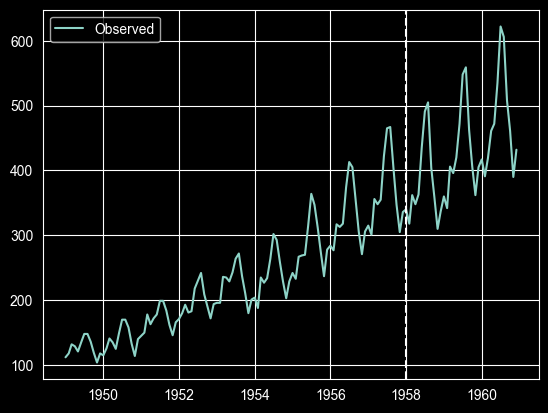

In [30]:
plt.figure()
plt.plot(y, label="Observed")
plt.axvline(pd.to_datetime(intervention_date), linestyle="--")
plt.legend()
plt.show()


In [34]:
delta = 0.7
dynamic = np.zeros(len(y))
dynamic[y.index.get_loc(intervention_date)] = 1

for t in range(1, len(dynamic)):
    dynamic[t] = delta * dynamic[t-1]

In [35]:
model_dyn = SARIMAX(
    y,
    order=(1,1,1),
    seasonal_order=(1,1,1,12),
    exog=dynamic
)

results_dyn = model_dyn.fit()
print(results_dyn.summary())


/Users/victor/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/victor/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.52844D+00    |proj g|=  8.65844D-02

At iterate    5    f=  3.52337D+00    |proj g|=  3.73531D-02

At iterate   10    f=  3.51577D+00    |proj g|=  4.96158D-03

At iterate   15    f=  3.51498D+00    |proj g|=  1.98133D-03

At iterate   20    f=  3.51493D+00    |proj g|=  6.39598D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     28      1     0     0   5.285D-06   3.515D+00
  F =   3.5149263537802731     

CONVERG

In [37]:
covariates = pd.DataFrame({
    "policy_1": (y.index >= "1955-01-01").astype(int),
    "policy_2": (y.index >= "1958-01-01").astype(int),
    "shock": (y.index == "1960-02-01").astype(int)
})

model_multi = SARIMAX(
    y,
    order=(1,1,1),
    seasonal_order=(1,1,1,12),
    exog=covariates
)

results_multi = model_multi.fit()
print(results_multi.summary())

ValueError: The indices for endog and exog are not aligned

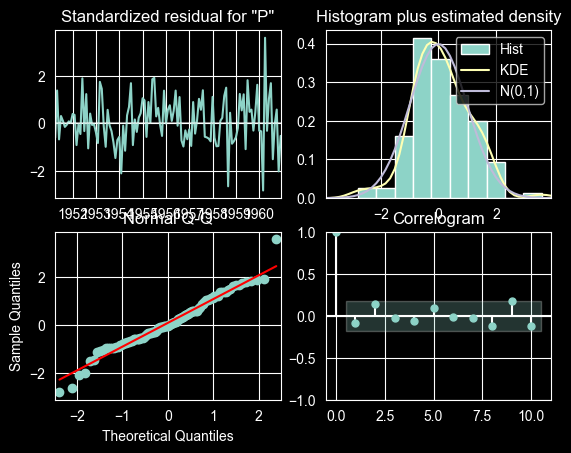

In [38]:
results.plot_diagnostics()
plt.show()
